# FINDING NON-ADHERENCE

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression as lg


### Reading medications for finding adherence.




In [34]:
med=pd.read_csv('medications.csv')
med

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,1983-09-08T17:27:52Z,1983-09-29T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,9e9670e5-da7f-4111-98a6-21d5e0aadd86,243670,Aspirin 81 MG Oral Tablet,7.35,0.0,1,7.35,NaN,NaN
42985,1984-09-23T17:27:52Z,1984-11-22T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,8d7d70be-467d-430f-8497-25aa2c1276b8,313782,Acetaminophen 325 MG Oral Tablet,5.26,0.0,2,10.52,NaN,NaN
42986,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,866414,24 HR metoprolol succinate 100 MG Extended Rel...,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)
42987,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,313988,Furosemide 40 MG Oral Tablet,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)




### Here we are droping the features mentioned below as this will not effect the Adherence

In [35]:
med=med.drop(['PAYER','ENCOUNTER','PAYER_COVERAGE','TOTALCOST','REASONCODE','REASONDESCRIPTION','DESCRIPTION','START','STOP'],axis=1)

In [36]:
med.sort_values('CODE',inplace=True)

In [37]:
med

,PATIENT,CODE,BASE_COST,DISPENSES
42252,b940dd35-39e3-49d9-918a-316db1e223e3,105078,11.67,1
6447,03172f6e-fb21-4770-8eef-513730174ab7,105078,13.96,1
42599,09867b02-24b8-4896-b38b-86782dd64ef1,105585,227.48,54
13283,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,105585,146.06,52
13796,5caf8d69-3d67-4264-9dc3-4dd69ddf327a,106258,6.26,217
...,...,...,...,...
20988,80427c8e-15ba-482f-b168-fc4f1d375179,2123111,1064.73,1
20990,80427c8e-15ba-482f-b168-fc4f1d375179,2123111,141.17,12
20992,80427c8e-15ba-482f-b168-fc4f1d375179,2123111,66.45,12
20860,a694ecfc-e39e-46dc-876e-029b32ba0135,2123111,510.80,12




#### Here we are creating a dataframe (dur) which stores the data for how many months a particular patient is taking a particular medication. We are using the DISPENSES column from (med) dataframe as it tells about the duration for which a particular patient is taking a particular medication.




In [38]:
g=med.groupby(['CODE','PATIENT'])

li=[]
li2=[]
for code,detail in g:
    li.append(code)
    li2.append(detail['DISPENSES'].sum())
dur=pd.DataFrame(li,columns=['code','patient'])
dur['duration']=li2

dur

,code,patient,duration
0,105078,03172f6e-fb21-4770-8eef-513730174ab7,1
1,105078,b940dd35-39e3-49d9-918a-316db1e223e3,1
2,105585,09867b02-24b8-4896-b38b-86782dd64ef1,54
3,105585,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,52
4,106258,10c64243-1b39-4f8d-8add-6c767a2f2e50,196
...,...,...,...
5019,2123111,eba0f292-1951-4af9-9f14-9d6e9db8e480,127
5020,2123111,f0f6572b-1588-4828-bb8b-e3148692e536,456
5021,2123111,f830d725-640c-4c94-972a-61207b748347,109
5022,2123111,fbb19794-9e58-4232-b7df-dfed61c3341f,185




#### Here we find the average duration for a particular medication to cure for various patients, and coverting it to a dataframe (avg_dur).



In [39]:
h=med.groupby('CODE')

li=[]
li1=[]
for code,detail in h:
    li.append(code)
    a=int(detail['DISPENSES'].mean())
    li1.append(a)
avg_dur=pd.DataFrame(li,columns=['code'])
avg_dur['average duration']=li1

avg_dur

,code,average duration
0,105078,1
1,105585,53
2,106258,186
3,106892,2
4,141918,368
...,...,...
126,1873983,1
127,1940648,1
128,2001499,365
129,2119714,1


In [40]:
x=dur.groupby('code')

cnt=[]
for i,detail in x:
    cnt.append(detail['code'].count())

li=[]
for i in range(len(cnt)):
    for j in range(cnt[i]):
        li.append(avg_dur['average duration'][i]) 

dur['average duration']=li
dur

,code,patient,duration,average duration
0,105078,03172f6e-fb21-4770-8eef-513730174ab7,1,1
1,105078,b940dd35-39e3-49d9-918a-316db1e223e3,1,1
2,105585,09867b02-24b8-4896-b38b-86782dd64ef1,54,53
3,105585,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,52,53
4,106258,10c64243-1b39-4f8d-8add-6c767a2f2e50,196,186
...,...,...,...,...
5019,2123111,eba0f292-1951-4af9-9f14-9d6e9db8e480,127,9
5020,2123111,f0f6572b-1588-4828-bb8b-e3148692e536,456,9
5021,2123111,f830d725-640c-4c94-972a-61207b748347,109,9
5022,2123111,fbb19794-9e58-4232-b7df-dfed61c3341f,185,9


#### Here we finally compare the duration of medication for a particular person with the average duration of that medication if the duration of medication is more than the average duration of that medication than that person is non adherent (ie False) and if duration of medication for a particular person is less than or equal to the average he/she is adherent(i.e True)

In [41]:
dur['adherence']=np.where(dur['duration']>dur['average duration'],False,True)

dur

# adherent person= true

,code,patient,duration,average duration,adherence
0,105078,03172f6e-fb21-4770-8eef-513730174ab7,1,1,True
1,105078,b940dd35-39e3-49d9-918a-316db1e223e3,1,1,True
2,105585,09867b02-24b8-4896-b38b-86782dd64ef1,54,53,False
3,105585,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,52,53,True
4,106258,10c64243-1b39-4f8d-8add-6c767a2f2e50,196,186,False
...,...,...,...,...,...
5019,2123111,eba0f292-1951-4af9-9f14-9d6e9db8e480,127,9,False
5020,2123111,f0f6572b-1588-4828-bb8b-e3148692e536,456,9,False
5021,2123111,f830d725-640c-4c94-972a-61207b748347,109,9,False
5022,2123111,fbb19794-9e58-4232-b7df-dfed61c3341f,185,9,False


In [42]:
dur.drop(['duration','average duration'],axis=1,inplace=True)

In [44]:
dur

,code,patient,adherence
0,105078,03172f6e-fb21-4770-8eef-513730174ab7,True
1,105078,b940dd35-39e3-49d9-918a-316db1e223e3,True
2,105585,09867b02-24b8-4896-b38b-86782dd64ef1,False
3,105585,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,True
4,106258,10c64243-1b39-4f8d-8add-6c767a2f2e50,False
...,...,...,...
5019,2123111,eba0f292-1951-4af9-9f14-9d6e9db8e480,False
5020,2123111,f0f6572b-1588-4828-bb8b-e3148692e536,False
5021,2123111,f830d725-640c-4c94-972a-61207b748347,False
5022,2123111,fbb19794-9e58-4232-b7df-dfed61c3341f,False


### Reading patients.csv for linking patients data with adherency

In [45]:
pat=pd.read_csv('patients.csv')
pat

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,25-05-1989,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,14-11-1983,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,02-06-1992,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,27-05-1978,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,18-10-1996,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,14-02-1922,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,08-08-1977,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,05-09-1914,26-05-2006,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,05-09-1914,17-03-1990,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


### We are droping the features mentioned below as this will not effect the Adherence

In [15]:
pat=pat.drop(['SSN','DRIVERS','MARITAL','PASSPORT','PREFIX','FIRST','LAST','SUFFIX','MAIDEN','ADDRESS','STATE','CITY','ZIP','HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE'],axis=1)

### Here to find the age of a person we are fixing the death day by todays's date

In [46]:
pat['DEATHDATE'].fillna('17-11-2021',inplace=True)
pat

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,25-05-1989,17-11-2021,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,14-11-1983,17-11-2021,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,02-06-1992,17-11-2021,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,27-05-1978,17-11-2021,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,18-10-1996,17-11-2021,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,14-02-1922,17-11-2021,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,08-08-1977,17-11-2021,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,05-09-1914,26-05-2006,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,05-09-1914,17-03-1990,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


### We substract Birthdate from Deathdate to find the age

In [47]:
def age(s1, s2):
    a=int(s1[6:])
    b=int(s2[6:])
    return b-a
  
li=[]
for i in range(len(pat['BIRTHDATE'])):
    li.append(age(pat['BIRTHDATE'][i],pat['DEATHDATE'][i]))
pat['AGE']=li

pat.drop(['BIRTHDATE','DEATHDATE'],axis=1,inplace=True)

pat

,Id,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,...,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,...,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,32
1,034e9e3b-2def-4559-bb2a-7850888ae060,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,...,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49,38
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,...,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40,29
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,...,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,43
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,...,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,...,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31,99
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,...,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52,44
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,...,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24,92
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,...,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00,76


### To get only the country from birth place we are taking 2 elements from end

In [48]:
def country(a):
    return a[-2:]

li=[]
for i in range(len(pat['BIRTHPLACE'])):
    li.append(country(pat['BIRTHPLACE'][i]))
    
    
pat['COUNTRY']=li
pat.drop(['BIRTHPLACE'],axis=1,inplace=True)

pat

,Id,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,...,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE,COUNTRY
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,32,DM
1,034e9e3b-2def-4559-bb2a-7850888ae060,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,...,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49,38,US
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40,29,US
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,...,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,43,US
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,...,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20,25,GR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,...,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31,99,MX
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,...,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52,44,US
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,...,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24,92,US
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,...,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00,76,US


In [49]:
def country(a):
    return a[:-7]

pat['COUNTY']=pat['COUNTY'].apply(country)

pat

,Id,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,...,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE,COUNTRY
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden,1013.0,42.228354,-72.562951,271227.08,1334.88,32,DM
1,034e9e3b-2def-4559-bb2a-7850888ae060,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,...,Somerville,Massachusetts,Middlesex,2143.0,42.360697,-71.126531,793946.01,3204.49,38,US
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden,1020.0,42.181642,-72.608842,574111.90,2606.40,29,US
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,...,Lowell,Massachusetts,Middlesex,1851.0,42.636143,-71.343255,935630.30,8756.19,43,US
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,...,Boston,Massachusetts,Suffolk,2135.0,42.352434,-71.028610,598763.07,3772.20,25,GR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,...,Cambridge,Massachusetts,Middlesex,2141.0,42.413390,-71.102083,1622314.87,32086.31,99,MX
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,...,Beverly,Massachusetts,Essex,1915.0,42.573337,-70.883400,979724.25,3130.52,44,US
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,...,Norwood,Massachusetts,Norfolk,NaN,42.211364,-71.213621,1560540.35,52391.24,92,US
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,...,Norwood,Massachusetts,Norfolk,2062.0,42.167146,-71.235461,1375833.47,13157.00,76,US


In [51]:
pat.rename(index=str, columns={'Id': 'patient'}, inplace=True)
pat

,patient,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,...,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE,COUNTRY
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden,1013.0,42.228354,-72.562951,271227.08,1334.88,32,DM
1,034e9e3b-2def-4559-bb2a-7850888ae060,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,...,Somerville,Massachusetts,Middlesex,2143.0,42.360697,-71.126531,793946.01,3204.49,38,US
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,...,Chicopee,Massachusetts,Hampden,1020.0,42.181642,-72.608842,574111.90,2606.40,29,US
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,...,Lowell,Massachusetts,Middlesex,1851.0,42.636143,-71.343255,935630.30,8756.19,43,US
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,...,Boston,Massachusetts,Suffolk,2135.0,42.352434,-71.028610,598763.07,3772.20,25,GR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,...,Cambridge,Massachusetts,Middlesex,2141.0,42.413390,-71.102083,1622314.87,32086.31,99,MX
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,...,Beverly,Massachusetts,Essex,1915.0,42.573337,-70.883400,979724.25,3130.52,44,US
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,...,Norwood,Massachusetts,Norfolk,NaN,42.211364,-71.213621,1560540.35,52391.24,92,US
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,...,Norwood,Massachusetts,Norfolk,2062.0,42.167146,-71.235461,1375833.47,13157.00,76,US


## Linking Patients.csv and Medications.csv

In [52]:
gender=[]
ethnicity=[]
race=[]
county=[]
country=[]
lat=[]
lon=[]
age=[]
for i in range(len(dur['patient'])):
    for j in range(len(pat['patient'])):
        if dur['patient'][i]==pat['patient'][j]:
            gender.append(pat['GENDER'][j])
            ethnicity.append(pat['ETHNICITY'][j])
            race.append(pat['RACE'][j])
            county.append(pat['COUNTY'][j])
            country.append(pat['COUNTRY'][j])
            lat.append(pat['LAT'][j])
            lon.append(pat['LON'][j])
            age.append(pat['AGE'][j])

In [53]:
k=dur
k['gender']=gender
k['ethnicity']=ethnicity
k['race']=race
k['county']=county
k['country']=country
k['lat']=lat
k['lon']=lon
k['age']=age

In [54]:
k

,code,patient,adherence,gender,ethnicity,race,county,country,lat,lon,age
0,105078,03172f6e-fb21-4770-8eef-513730174ab7,True,F,nonhispanic,white,Worcester,US,42.591428,-72.023533,7
1,105078,b940dd35-39e3-49d9-918a-316db1e223e3,True,M,nonhispanic,white,Bristol,US,41.599499,-71.066024,10
2,105585,09867b02-24b8-4896-b38b-86782dd64ef1,False,M,nonhispanic,asian,Middlesex,US,42.610319,-71.166038,64
3,105585,c6fc7fe8-483a-4df7-ba2b-260ea4de9aa4,True,M,nonhispanic,asian,Middlesex,VN,42.619680,-71.342966,58
4,106258,10c64243-1b39-4f8d-8add-6c767a2f2e50,False,M,hispanic,black,Suffolk,US,42.336368,-71.040931,35
...,...,...,...,...,...,...,...,...,...,...,...
5019,2123111,eba0f292-1951-4af9-9f14-9d6e9db8e480,False,F,nonhispanic,white,Plymouth,US,41.739846,-70.801886,14
5020,2123111,f0f6572b-1588-4828-bb8b-e3148692e536,False,M,nonhispanic,white,Middlesex,US,42.631775,-71.314647,43
5021,2123111,f830d725-640c-4c94-972a-61207b748347,False,M,nonhispanic,white,Hampshire,US,42.213764,-72.623599,12
5022,2123111,fbb19794-9e58-4232-b7df-dfed61c3341f,False,F,nonhispanic,white,Middlesex,US,42.458626,-71.106451,21


### Plotting Gender vs Non-adherence Graph

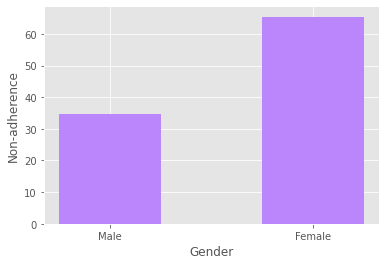

In [55]:
%matplotlib inline

plt.style.use('ggplot')
        
non_ad=k['gender'][k['adherence']==False].count()
m_cnt=k['gender'][k['adherence']==False][k['gender']=='M'].count()
f_cnt=non_ad-m_cnt

plt.xlabel('Gender')
plt.ylabel('Non-adherence')

plt.bar(['Male','Female'],[(m_cnt*100)/non_ad,(f_cnt*100)/non_ad],width=0.5,color='#BB86FC')
plt.show()

### Plotting Ethinicity vs Non-adherence Graph

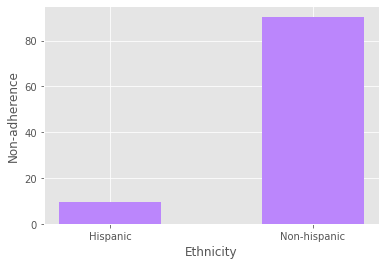

In [56]:
%matplotlib inline

plt.style.use('ggplot')
        
non_ad=k['ethnicity'][k['adherence']==False].count()
h_cnt=k['ethnicity'][k['adherence']==False][k['ethnicity']=='hispanic'].count()
nh_cnt=non_ad-h_cnt


plt.xlabel('Ethnicity')
plt.ylabel('Non-adherence')


plt.bar(['Hispanic','Non-hispanic'],[(h_cnt*100)/non_ad,(nh_cnt*100)/non_ad],width=0.5,color='#BB86FC')
plt.show()

### Plotting Race vs Non-adherence Graph

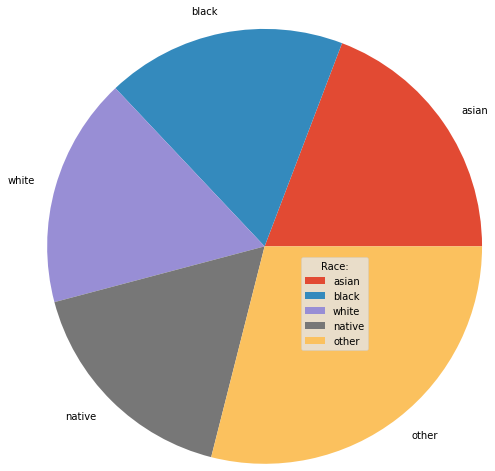

In [57]:
%matplotlib inline

plt.style.use('ggplot')

# plt.xlabel('Race')
# plt.ylabel('Non-adherence')
# plt.bar(ra.keys(),ra.values(),width=0.5,color='r')

ra=Counter(k['race'][k['adherence']==False])
ra_cnt=Counter(k['race'])

li=[]

for i in ra.keys():
    if i in ra_cnt.keys():
        li.append(ra[i]/ra_cnt[i])
        
plt.pie(li,labels=ra.keys(),radius=2.5)
plt.legend(title='Race:',loc='best')        
plt.show()

### Plotting County vs Non-adherence Graph

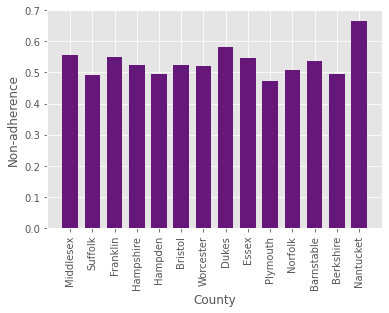

In [58]:
%matplotlib inline

plt.style.use('ggplot')

county=Counter(k['county'][k['adherence']==False])
county_cnt=Counter(k['county'])
        
li=[]
for i in county.keys():
    if i in county_cnt.keys():
        li.append(county[i]/county_cnt[i])
        
plt.xlabel('County')
plt.ylabel('Non-adherence')

plt.bar(county.keys(),li,width=0.7,color='#65187A')
plt.xticks(range(len(county.keys())), county.keys(), rotation=90)
plt.show()

# plt.pie(county.values(),labels=county.keys(),radius=2.5)
# plt.legend(title='Race:',loc='best')

### Plotting Non-adherence vs Country Graph

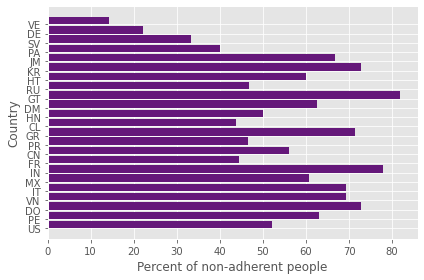

In [59]:
%matplotlib inline

plt.style.use('ggplot')

from collections import Counter

country=Counter(k['country'])
country_cnt=Counter(k['country'][k['adherence']==False])          #count of countries which are non-adherent


non_ad_countries=[]
per_of_nonad=[]

for key,val in country_cnt.items():
    non_ad_countries.append(key)
    per_of_nonad.append((val*100)/country[key])

plt.barh(non_ad_countries,per_of_nonad,color='#65187A',align='edge')

plt.xlabel('Percent of non-adherent people')
plt.ylabel('Country')
plt.tight_layout()

### Plotting Age-grouping vs Non-adherence Graph

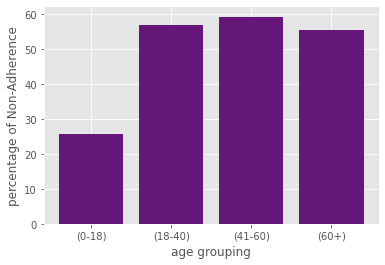

In [60]:
%matplotlib inline

plt.style.use('ggplot')

c_cnt=k['age'][k['adherence']==False][k['age']<=18].count()
a_cnt=k['age'][k['adherence']==False][k['age']>18][k['age']<=40].count()
m_cnt=k['age'][k['adherence']==False][k['age']>40][k['age']<=60].count()
o_cnt=k['age'][k['adherence']==False][k['age']>60].count()


cc_cnt=k['age'][k['age']<=18].count()
aa_cnt=k['age'][k['age']>18][k['age']<=40].count()
mm_cnt=k['age'][k['age']>40][k['age']<=60].count()
oo_cnt=k['age'][k['age']>60].count()        
                 

plt.bar(['(0-18)','(18-40)','(41-60)','(60+)'],[(c_cnt*100)/cc_cnt,(100*a_cnt)/aa_cnt,(100*m_cnt)/mm_cnt,(100*o_cnt)/oo_cnt],color='#65187A')    
plt.ylabel('percentage of Non-Adherence')
plt.xlabel('age grouping')
plt.show()

# plt.hist(k['age'],bins=range(1,120,10))

### Plotting latitude vs Longitude Graph for Non Adherence 

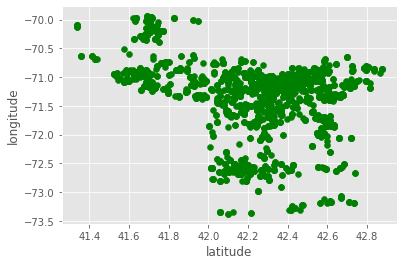

In [62]:
%matplotlib inline

plt.style.use('ggplot')

lat=k['lat'][k['adherence']==False]
lon=k['lon'][k['adherence']==False]

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.scatter(lat,lon,color='g')
plt.show()

# Model Creation

In [65]:
final=k.drop(['code','patient','lat','lon'],axis=1)

In [66]:
final

,adherence,gender,ethnicity,race,county,country,age
0,True,F,nonhispanic,white,Worcester,US,7
1,True,M,nonhispanic,white,Bristol,US,10
2,False,M,nonhispanic,asian,Middlesex,US,64
3,True,M,nonhispanic,asian,Middlesex,VN,58
4,False,M,hispanic,black,Suffolk,US,35
...,...,...,...,...,...,...,...
5019,False,F,nonhispanic,white,Plymouth,US,14
5020,False,M,nonhispanic,white,Middlesex,US,43
5021,False,M,nonhispanic,white,Hampshire,US,12
5022,False,F,nonhispanic,white,Middlesex,US,21


### Here we are using LabelEncoder to convert the strings into numerical values 

In [67]:
from sklearn.preprocessing import LabelEncoder
le_adherence=LabelEncoder()
le_gender=LabelEncoder()
le_ethnicity=LabelEncoder()
le_race=LabelEncoder()
le_county=LabelEncoder()
le_country=LabelEncoder()


final['adherence']=le_adherence.fit_transform(final['adherence'])     #0 for false
final['gender']=le_gender.fit_transform(final['gender'])     #0 for female
final['ethnicity']=le_ethnicity.fit_transform(final['ethnicity'])   #0 for hispanic
final['race']=le_race.fit_transform(final['race'])
final['county']=le_county.fit_transform(final['county'])
final['country']=le_country.fit_transform(final['country'])

In [68]:
final

,adherence,gender,ethnicity,race,county,country,age
0,1,0,1,4,13,22,7
1,1,1,1,4,2,22,10
2,0,1,1,0,8,22,64
3,1,1,1,0,8,24,58
4,0,1,0,1,12,22,35
...,...,...,...,...,...,...,...
5019,0,0,1,4,11,22,14
5020,0,1,1,4,8,22,43
5021,0,1,1,4,7,22,12
5022,0,0,1,4,8,22,21


### We are using Normalisation to make dataset more precised

In [69]:
final['gender']=final['gender'].apply(lambda x: (x-final['gender'].mean())/final['gender'].std())
final['ethnicity']=final['ethnicity'].apply(lambda x: (x-final['ethnicity'].mean())/final['ethnicity'].std())
final['country']=final['country'].apply(lambda x: (x-final['country'].mean())/final['country'].std())
final['county']=final['county'].apply(lambda x: (x-final['county'].mean())/final['county'].std())
final['race']=final['race'].apply(lambda x: (x-final['race'].mean())/final['race'].std())

In [70]:
final

,adherence,gender,ethnicity,race,county,country,age
0,1,-0.820280,0.322355,0.467459,1.337773,0.245151,7
1,1,1.218853,0.322355,0.467459,-1.495797,0.245151,10
2,0,1.218853,0.322355,-2.585535,0.049786,0.245151,64
3,1,1.218853,0.322355,-2.585535,0.049786,0.804731,58
4,0,1.218853,-3.101556,-1.822286,1.080176,0.245151,35
...,...,...,...,...,...,...,...
5019,0,-0.820280,0.322355,0.467459,0.822578,0.245151,14
5020,0,1.218853,0.322355,0.467459,0.049786,0.245151,43
5021,0,1.218853,0.322355,0.467459,-0.207811,0.245151,12
5022,0,-0.820280,0.322355,0.467459,0.049786,0.245151,21


In [71]:
X=final.drop(['adherence'],axis=1)
Y=final['adherence']

### We split the data set in train and test sets.

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [74]:
x_train

,gender,ethnicity,race,county,country,age
4380,1.218853,0.322355,0.467459,0.822578,0.245151,63
4826,1.218853,0.322355,0.467459,0.564981,0.245151,17
2160,-0.820280,0.322355,-2.585535,-0.465408,-5.630444,21
1605,-0.820280,0.322355,-1.822286,0.564981,0.245151,14
2323,1.218853,0.322355,-1.822286,1.080176,0.245151,83
...,...,...,...,...,...,...
102,1.218853,0.322355,0.467459,0.564981,0.245151,32
3922,-0.820280,0.322355,0.467459,0.564981,0.245151,32
383,-0.820280,0.322355,0.467459,0.822578,0.245151,6
1167,1.218853,0.322355,0.467459,0.049786,0.245151,41


In [75]:
from sklearn.model_selection import cross_val_score

### We finally find the mean accuracy of the dataset using various models

In [76]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(),X,Y).mean()

0.5672676458345721

In [77]:
from sklearn import tree
cross_val_score(tree.DecisionTreeClassifier(),X,Y).mean()

0.5885726744762245

In [78]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,Y).mean()

0.5935408614299023

In [80]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40,max_features=4,max_depth=5,min_samples_leaf=9),X,Y).mean()

0.5947384590989276

### From the above observation we found that the Random Forest Classifier gives high Accuracy Comapred to other. So we are creating the model using Random Forest Classifier.

## Creating the Model

In [81]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40,max_features=4,max_depth=5,min_samples_leaf=9)

model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=9,
                       n_estimators=40)

In [82]:
model.score(x_test,y_test)
# model.score(x_train,y_train)

0.6109452736318408

## Extracting the Model

In [83]:
import joblib

joblib.dump(model,'Final_model')

['Final_model']

In [84]:
a=joblib.load('Final_model')

In [85]:
li=[-0.820280,0.322355,0.467459,0.564981,0.245151,62]
a.predict([li])

array([1], dtype=int64)